Importing the Dependencies


In [1]:
import numpy as np 


**Linear Regression**

In [23]:
class LinearRegression:

    def __init__(self,learning_rate, no_of_iter):
        self.learning_rate = learning_rate
        self.no_of_iter = no_of_iter



    def fit(self,X,Y):

        self.m,self.n = X.shape

        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.no_of_iter) : 
            self.updateWeights()



    def updateWeights(self): 
        Y_pred = self.predict(self.X)
        dw = - (2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
        db = - (2 * np.sum(self.Y - Y_pred)) / self.m

        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
        



    def predict(self,X):
        return X.dot(self.w) + self.b








## **Prediction Using Our Own Model**


# Data Collection and Analysis

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('salary_data.csv')

In [9]:
data.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [10]:
data.shape

(30, 2)

In [11]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [13]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [36]:
X = data.iloc[:,[0]].values
Y = data.iloc[:,1].values

In [37]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [38]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


# Splitting of the Training Data and Test Data 

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=40)

In [44]:
print(X.shape,X_test.shape,X_train.shape)

(30, 1) (9, 1) (21, 1)


# Model Training 

In [46]:
model = LinearRegression(learning_rate=0.02, no_of_iter=100)
model.fit(X_train,Y_train)

In [48]:
print(f'The weight of the model is {model.w[0]}')
print(f'The Bias of the Model is {model.b}')

The weight of the model is 10848.847236129628
The Bias of the Model is 16826.59576203677


So, The equation for prediction of salary is : salary = 10848(Experience) + 16826

# Prediction and Visualization

In [52]:
pred = model.predict(X_test)

In [53]:
print(pred)

[ 33099.86661623  72155.7166663   81919.67917881  65646.40832462
  69985.94721907  61306.86943017  90598.75696772  38524.2902343
 130739.4917414 ]


Now Visualization of the Actual and Predicted price is : 

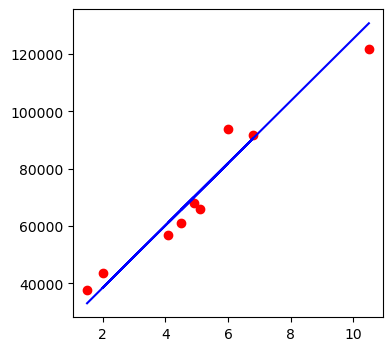

In [58]:
plt.figure(figsize=(4,4))
plt.scatter(X_test,Y_test,c='red')
plt.plot(X_test, pred,c='blue')